In [1]:
import random
def random_kid():
    return random.choice(['boy','girl'])


both_girls = 0
older_girl = 0
either_girl = 0
random.seed(2)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older =='girl':
        older_girl +=1
    if older =='girl' and younger =='girl':
        both_girls +=1
    if older =='girl' or younger =='girl':
        either_girl +=1

In [2]:
print('p(both| older):',both_girls / older_girl)
print('p(both| either):',both_girls / either_girl)

p(both| older): 0.5059453032104637
p(both| either): 0.33836978131212725


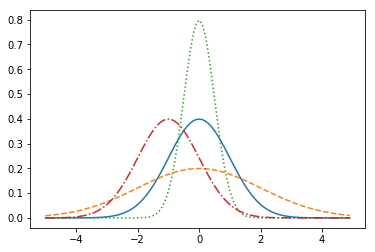

In [3]:
###均勻分佈的密度函數
def uniform_pdf(x):
    return 1 if x > 0 and x < 1 else 0


###累積分佈密度函數
def uniform_cdf(x):
    if x < 0:   return 0 #均勻隨機變數絕不會小於0
    elif x < 1: return x # 例如 p(x <= 0.4 ) =0.4
    else:       return 1 #均勻隨機變數永遠小於1
    
###常態分布密度函數
import math
def normal_pdf(x , mu=0 , sigma = 1):
    sqrt_two_pi = math.sqrt(2* math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 /sigma ** 2) / (sqrt_two_pi * sigma))


###作圖 (常態機率密度函數)
import matplotlib.pyplot as plt
xs = [x / 10.0 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma=1)   for x in xs],'-',label='mu = 0,sigma = 1')
plt.plot(xs,[normal_pdf(x,sigma=2)   for x in xs],'--',label='mu = 0,sigma = 2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu = 0,sigma = 0.5')
plt.plot(xs,[normal_pdf(x,mu=-1)     for x in xs],'-.',label='mu = -1,sigma=1')
plt.show()

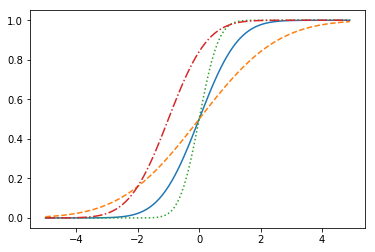

In [4]:
###常態分佈的累積分佈
def normal_cdf(x,mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

###作圖(常態累積分佈數)
import matplotlib.pyplot as plt
xs = [x / 10.0 for x in range(-50,50)]
plt.plot(xs,[normal_cdf(x,sigma=1)   for x in xs],'-',label='mu = 0,sigma = 1')
plt.plot(xs,[normal_cdf(x,sigma=2)   for x in xs],'--',label='mu = 0,sigma = 2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu = 0,sigma = 0.5')
plt.plot(xs,[normal_cdf(x,mu=-1)     for x in xs],'-.',label='mu = -1,sigma=1')
plt.show()



In [7]:
###二元搜尋
def inverse_normal_cdf(p, mu=0, sigma=1 ,tolerance=0.00001):
    """用二元搜尋法逆向求出近似值"""
    #如果不是標準常態分佈,就先轉換成標準常態分佈
    if mu !=0 or sigma !=1:
        return mu + sigma * inverse_normal_cdf(p,tolerance=tolerance)
    low_z , low_p = -10.0 , 0
    hi_z , hi_p = 10 , 1
    while hi_z -low_z > tolerance:
        mid_z = (low_z+ hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            #中點的值還太低,就往上繼續搜尋
            low_z , low_p = mid_z , mid_p
        elif mid_p > p:
            #中點的值還太高,就往下繼續搜尋
            hi_z,hi_p = mid_z , mid_p
        else:
            break
    return mid_z
###伯努利隨機變數
def bernoulli_trial(p):
    return 1 if random.random() < p else 0
###
def binomial(n,p):
    return sum(bernoulli_trial(p) for _ in range(n))

####畫圖
from collections import Counter
def make_hist(p,n ,num_points):
    data=[binomial(n,p) for _ in range(num_points)]
    
    #用長條圖呈現二項式取樣的實際結果
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color = '0.75')
    mu = p*n
    signma = math.sqrt(n * p * (1-p))
    #用折線圖顯示常態近似結果
    xs = range(min(data),max(data)+1)
    ys = [normal_cdf(i+0.5 , mu , sigma) - normal_cdf(i-0.5, mu, sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show
    
    
    
##########
make_hist(0.75,100,10000)

NameError: name 'sigma' is not defined

In [33]:
binomial(100,0.75)

82

In [22]:
math.exp(2+2)

54.598150033144236